### Tutorial 6c - Miltilayer Stack
Base example with (TiO $_2$ /SiO $_2$ )*10 on BK7

In [1]:
import optiland.backend as be
from optiland.thin_film import ThinFilmStack, SpectralAnalyzer
from optiland.materials import Material, IdealMaterial

In [2]:
SiO2 = Material("SiO2", reference="Gao")
TiO2 = Material("TiO2", reference="Zhukovsky")
BK7 = Material("N-BK7", reference="SCHOTT")
air = IdealMaterial(n=1.0)

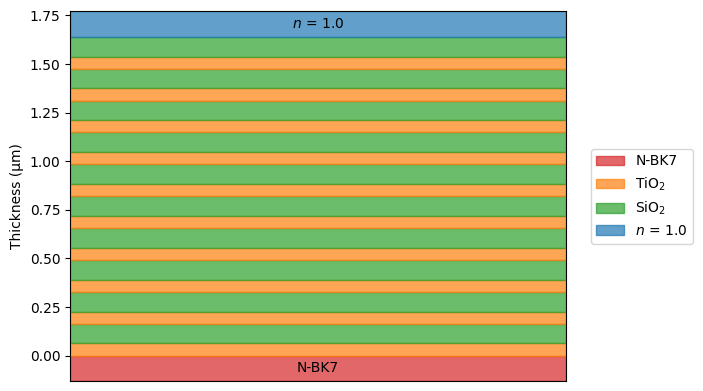

In [3]:
stack = ThinFilmStack(incident_material=air, substrate_material=BK7, reference_wl_um=0.6)
for _ in range(10):
    stack.add_layer_qwot(material=TiO2,qwot_thickness=1.0, name="TiO$_2$")
    stack.add_layer_qwot(material=SiO2, qwot_thickness=1.0, name="SiO$_2$")

fig, ax = stack.plot_structure()

### SpectralAnalyzer
This is a plot helper to plot R/T/A versus wavelength and/or AOI. 
`wavelength_view()` (nm, μm, eV, cm⁻¹, Hz are available), `angular_view()`, `map_view()`

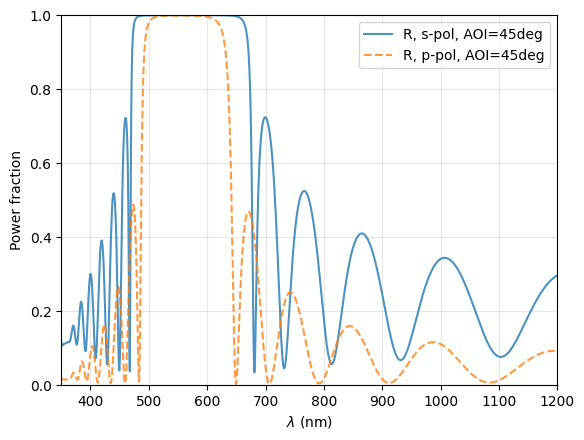

In [4]:
analyzer = SpectralAnalyzer(stack=stack)
wl = be.linspace(350, 1200, 1000) # Wavelength range in nm
fig, ax = analyzer.wavelength_view(wl, 
                                   wavelength_unit='nm', 
                                   aoi=45, to_plot=["R"], 
                                   polarization=["s", "p"])

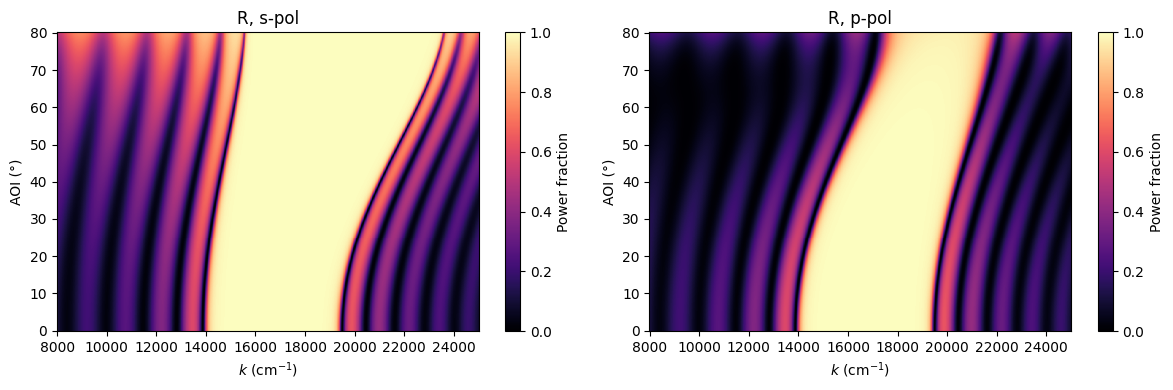

In [5]:
wl = be.linspace(8000, 25000, 1000) # approximatly 0.4 to 1.25 um in wavenumber
angles = be.linspace(0, 80, 300)
fig, ax = analyzer.map_view(wavelength_values=wl, 
                            wavelength_unit='wavenumber',
                            aoi_values=angles, aoi_unit="deg",
                            to_plot=["R"], 
                            polarization=["s", "p"], 
                            colormap="magma")